In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mplsoccer.pitch import Pitch

In [2]:
print(os.getcwd()) #get directory 
#os.listdir(os.getcwd())

/Users/rao/Desktop


In [3]:
df = pd.read_csv('/Users/rao/Desktop/Football_Data/Barca_Alaves.csv')
pd.set_option('display.max_columns', None)
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type/displayName,outcomeType/value,outcomeType/displayName,isTouch,playerId,qualifiers/0/type/value,qualifiers/0/type/displayName,qualifiers/0/value,qualifiers/1/type/value,qualifiers/1/type/displayName,qualifiers/2/type/value,qualifiers/2/type/displayName,qualifiers/2/value,qualifiers/3/type/value,qualifiers/3/type/displayName,qualifiers/3/value,qualifiers/4/type/value,qualifiers/4/type/displayName,qualifiers/4/value,qualifiers/5/type/value,qualifiers/5/type/displayName,qualifiers/5/value,satisfiedEventsTypes/0,satisfiedEventsTypes/1,satisfiedEventsTypes/2,satisfiedEventsTypes/3,satisfiedEventsTypes/4,satisfiedEventsTypes/5,satisfiedEventsTypes/6,endX,endY,qualifiers/1/value,qualifiers/6/type/value,qualifiers/6/type/displayName,qualifiers/6/value,qualifiers/7/type/value,qualifiers/7/type/displayName,qualifiers/7/value,satisfiedEventsTypes/7,satisfiedEventsTypes/8,satisfiedEventsTypes/9,relatedEventId,relatedPlayerId,qualifiers/8/type/value,qualifiers/8/type/displayName,qualifiers/8/value,qualifiers/9/type/value,qualifiers/9/type/displayName,qualifiers/9/value,qualifiers/10/type/value,qualifiers/10/type/displayName,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/12/type/value,qualifiers/12/type/displayName,qualifiers/12/value,qualifiers/13/type/value,qualifiers/13/type/displayName,qualifiers/13/value,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,qualifiers/11/value,satisfiedEventsTypes/10,satisfiedEventsTypes/11,cardType/value,cardType/displayName,satisfiedEventsTypes/12,satisfiedEventsTypes/13,satisfiedEventsTypes/14,isGoal,qualifiers/14/type/value,qualifiers/14/type/displayName,qualifiers/14/value
0,2264457961,2,0,0.0,60,0.0,0.0,0,1,FirstHalf,32,Start,1,Successful,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2264457963,2,0,0.0,65,0.0,0.0,0,1,FirstHalf,32,Start,1,Successful,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2264457975,3,0,0.0,60,50.0,50.0,0,1,FirstHalf,1,Pass,1,Successful,True,135663.0,56.0,Zone,Back,178.0,StandingSave,212.0,Length,18.7,141.0,PassEndY,44.3,213.0,Angle,3.4,140.0,PassEndX,32.6,90.0,116.0,29.0,34.0,37.0,214.0,217.0,32.6,44.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2264457995,4,0,2.0,60,34.6,44.5,0,1,FirstHalf,1,Pass,1,Successful,True,336836.0,56.0,Zone,Center,141.0,PassEndY,1.0,Longball,NaN,140.0,PassEndX,72.6,155.0,Chipped,NaN,178.0,StandingSave,NaN,90.0,118.0,116.0,123.0,126.0,204.0,35.0,72.6,67.2,67.2,213.0,Angle,0.4,212.0,Length,42.8,36.0,216.0,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2264457997,5,0,5.0,60,71.0,70.4,0,1,FirstHalf,44,Aerial,1,Successful,False,74603.0,286.0,Offensive,NaN,233.0,OppositeRelatedEvent,56.0,Zone,Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [4]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period/value', 'period/displayName', 'type/value',
       'type/displayName', 'outcomeType/value', 'outcomeType/displayName',
       'isTouch', 'playerId', 'qualifiers/0/type/value',
       'qualifiers/0/type/displayName', 'qualifiers/0/value',
       'qualifiers/1/type/value', 'qualifiers/1/type/displayName',
       'qualifiers/2/type/value', 'qualifiers/2/type/displayName',
       'qualifiers/2/value', 'qualifiers/3/type/value',
       'qualifiers/3/type/displayName', 'qualifiers/3/value',
       'qualifiers/4/type/value', 'qualifiers/4/type/displayName',
       'qualifiers/4/value', 'qualifiers/5/type/value',
       'qualifiers/5/type/displayName', 'qualifiers/5/value',
       'satisfiedEventsTypes/0', 'satisfiedEventsTypes/1',
       'satisfiedEventsTypes/2', 'satisfiedEventsTypes/3',
       'satisfiedEventsTypes/4', 'satisfiedEventsTypes/5',
       'satisfiedEventsTypes/6', 'endX', 'endY', 'q

In [5]:
df = df[['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 
         'period/value', 'type/displayName','outcomeType/displayName',
         'playerId','endX', 'endY' ]]
df = df[df['teamId'] == 65] #Get data for Barcelona only 
df 

,id,eventId,minute,second,teamId,x,y,period/value,type/displayName,outcomeType/displayName,playerId,endX,endY
1,2264457963,2,0,0.0,65,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
5,2264458011,3,0,5.0,65,29.0,29.6,1,Aerial,Unsuccessful,409030.0,NaN,NaN
7,2264458017,4,0,6.0,65,23.0,31.0,1,BallRecovery,Successful,279423.0,NaN,NaN
8,2264458031,5,0,7.0,65,23.0,31.0,1,Pass,Successful,279423.0,8.3,42.2
9,2264458043,6,0,9.0,65,8.3,42.2,1,Pass,Successful,80774.0,19.9,91.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2264500039,1181,90,49.0,65,55.1,51.8,2,Pass,Successful,89931.0,50.3,34.2
1692,2264500051,1182,90,52.0,65,46.6,22.4,2,Pass,Successful,236511.0,58.5,3.4
1694,2264500061,1183,90,57.0,65,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1696,2264500305,1184,0,0.0,65,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [6]:
#now we want to find our passes and recipients and then filter for only passes
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type/displayName']=='Pass']
successful = passes[passes['outcomeType/displayName']=='Successful']

In [7]:
successful


,id,eventId,minute,second,teamId,x,y,period/value,type/displayName,outcomeType/displayName,playerId,endX,endY,passer,recipient
8,2264458031,5,0,7.0,65,23.0,31.0,1,Pass,Successful,279423.0,8.3,42.2,279423.0,80774.0
9,2264458043,6,0,9.0,65,8.3,42.2,1,Pass,Successful,80774.0,19.9,91.1,80774.0,351252.0
10,2264458049,7,0,14.0,65,13.0,95.3,1,Pass,Successful,351252.0,20.9,92.4,351252.0,372827.0
11,2264458057,8,0,15.0,65,20.9,92.4,1,Pass,Successful,372827.0,18.7,90.3,372827.0,351252.0
12,2264458059,9,0,16.0,65,20.7,87.2,1,Pass,Successful,351252.0,21.9,75.4,351252.0,44721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2264499965,1177,90,37.0,65,63.9,25.8,2,Pass,Successful,368409.0,73.2,6.1,368409.0,11119.0
1687,2264499989,1178,90,44.0,65,76.3,40.4,2,Pass,Successful,11119.0,76.1,54.8,11119.0,372827.0
1688,2264500007,1179,90,46.0,65,72.8,50.0,2,Pass,Successful,372827.0,65.6,38.3,372827.0,30226.0
1691,2264500039,1181,90,49.0,65,55.1,51.8,2,Pass,Successful,89931.0,50.3,34.2,89931.0,236511.0


In [8]:
#find the first subsititution and filter the successful dataframe to be less than that minute
subs = df[df['type/displayName']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

successful = successful[successful['minute'] < firstSub]

In [9]:
successful

,id,eventId,minute,second,teamId,x,y,period/value,type/displayName,outcomeType/displayName,playerId,endX,endY,passer,recipient
8,2264458031,5,0,7.0,65,23.0,31.0,1,Pass,Successful,279423.0,8.3,42.2,279423.0,80774.0
9,2264458043,6,0,9.0,65,8.3,42.2,1,Pass,Successful,80774.0,19.9,91.1,80774.0,351252.0
10,2264458049,7,0,14.0,65,13.0,95.3,1,Pass,Successful,351252.0,20.9,92.4,351252.0,372827.0
11,2264458057,8,0,15.0,65,20.9,92.4,1,Pass,Successful,372827.0,18.7,90.3,372827.0,351252.0
12,2264458059,9,0,16.0,65,20.7,87.2,1,Pass,Successful,351252.0,21.9,75.4,351252.0,44721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,2264476247,593,44,48.0,65,13.3,39.8,1,Pass,Successful,279423.0,15.1,32.4,279423.0,397469.0
844,2264476263,595,44,49.0,65,15.1,32.4,1,Pass,Successful,397469.0,20.4,40.4,397469.0,44721.0
845,2264476283,596,44,50.0,65,20.4,40.4,1,Pass,Successful,44721.0,32.4,62.1,44721.0,372827.0
846,2264476293,597,44,54.0,65,46.5,65.7,1,Pass,Successful,372827.0,68.7,90.9,372827.0,80241.0


In [10]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')
successful['passer'] = pas
successful['recipient'] = rec

/Users/rao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/rao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
#now we need to find the average locations and counts of the passes
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [12]:
average_locations

,x,y,count
passer,,,
11119,68.675000,38.712500,24
44721,54.911111,50.738889,54
80241,66.014286,69.228571,21
80774,11.584615,47.923077,13
236511,47.220968,67.045161,62
279423,43.303077,40.612308,65
351252,54.756000,85.360000,25
368409,69.729412,16.911765,17
372827,59.377358,61.892453,53


In [13]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [14]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,11119,44721,8,68.675000,38.712500,24,54.911111,50.738889,54
18,80241,44721,3,66.014286,69.228571,21,54.911111,50.738889,54
31,236511,44721,4,47.220968,67.045161,62,54.911111,50.738889,54
40,279423,44721,11,43.303077,40.612308,65,54.911111,50.738889,54
50,351252,44721,4,54.756000,85.360000,25,54.911111,50.738889,54
...,...,...,...,...,...,...,...,...,...
76,397469,236511,1,51.845098,18.111765,51,47.220968,67.045161,62
84,409030,236511,3,63.640741,39.207407,27,47.220968,67.045161,62
33,236511,80774,3,47.220968,67.045161,62,11.584615,47.923077,13
42,279423,80774,2,43.303077,40.612308,65,11.584615,47.923077,13


In [15]:
#set minimum threshold of combinations.. I like 5 for high passing teams. 2 or 3 for low passing.
pass_between = pass_between[pass_between['pass_count']>1]
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,11119,44721,8,68.675000,38.712500,24,54.911111,50.738889,54
18,80241,44721,3,66.014286,69.228571,21,54.911111,50.738889,54
31,236511,44721,4,47.220968,67.045161,62,54.911111,50.738889,54
40,279423,44721,11,43.303077,40.612308,65,54.911111,50.738889,54
50,351252,44721,4,54.756000,85.360000,25,54.911111,50.738889,54
...,...,...,...,...,...,...,...,...,...
66,372827,236511,7,59.377358,61.892453,53,47.220968,67.045161,62
84,409030,236511,3,63.640741,39.207407,27,47.220968,67.045161,62
33,236511,80774,3,47.220968,67.045161,62,11.584615,47.923077,13
42,279423,80774,2,43.303077,40.612308,65,11.584615,47.923077,13


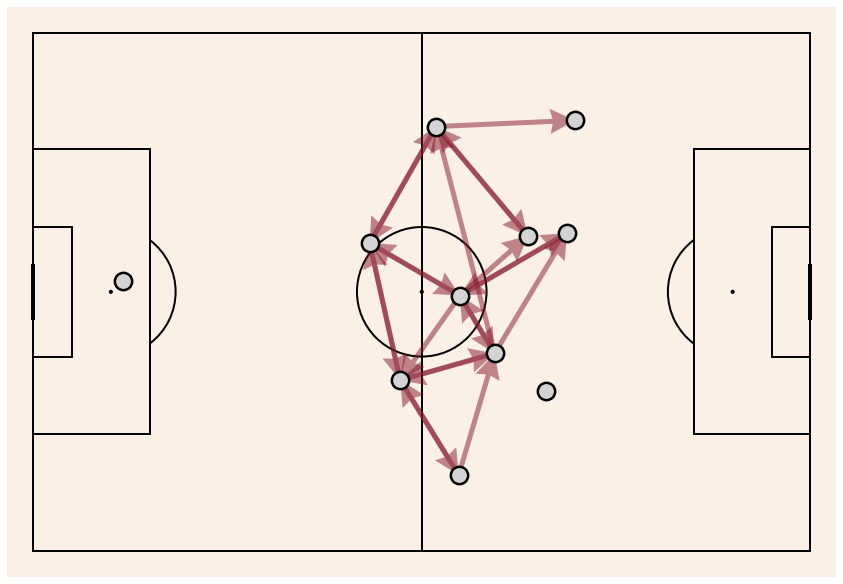

In [84]:
#Shows passing network between players from their average positions 

pitch = pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='linen', line_color='black', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 5, headwidth = 5, color = '#86162a', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)